<a href="https://colab.research.google.com/github/farhanrhine/deep-learning/blob/main/Pooling_and_CNN_Backpropagation_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. How Pooling Works Behind the Scenes ?
# 2. How CNN Backpropgation Work behind the Scenes ?

In [1]:
import cv2 # opencv library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline


```
# Pooling Working
```



In [2]:
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
lena_path = tf.keras.utils.get_file('lena.png', origin=url)
lena = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

473831/473831 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)
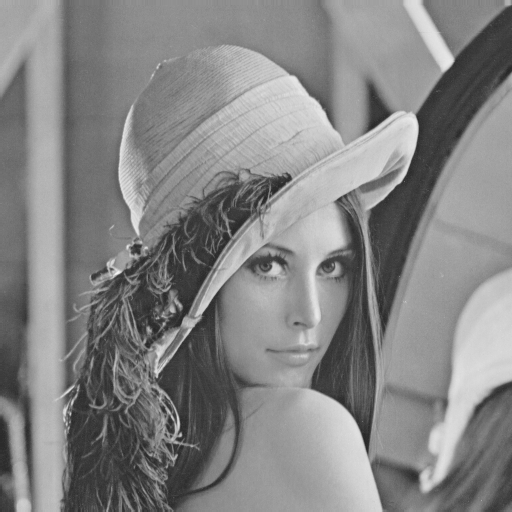

In [3]:
lena

In [4]:
print("Original Lena shape:", lena.shape)

Original Lena shape: (512, 512)


In [5]:
lena_tensor = lena.astype('float32') / 255.0 # normalize on grayscale range 0-255
lena_tensor = np.expand_dims(lena_tensor, axis=(0, -1)) # then pass into tesnor

In [6]:
lena_tensor

array([[[[0.6627451 ],
         [0.6627451 ],
         [0.65882355],
         ...,
         [0.6862745 ],
         [0.63529414],
         [0.5411765 ]],

        [[0.6627451 ],
         [0.6627451 ],
         [0.65882355],
         ...,
         [0.6862745 ],
         [0.63529414],
         [0.5411765 ]],

        [[0.6627451 ],
         [0.6627451 ],
         [0.65882355],
         ...,
         [0.6862745 ],
         [0.63529414],
         [0.5411765 ]],

        ...,

        [[0.20784314],
         [0.20784314],
         [0.23137255],
         ...,
         [0.4509804 ],
         [0.4392157 ],
         [0.44705883]],

        [[0.20784314],
         [0.20784314],
         [0.2509804 ],
         ...,
         [0.45882353],
         [0.4627451 ],
         [0.47843137]],

        [[0.20784314],
         [0.20784314],
         [0.2509804 ],
         ...,
         [0.45882353],
         [0.4627451 ],
         [0.47843137]]]], dtype=float32)

In [16]:
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=2)(lena_tensor)
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=2)(lena_tensor)

In [17]:
max_pool

<tf.Tensor: shape=(1, 255, 255, 1), dtype=float32, numpy=
array([[[[0.6627451 ],
         [0.6627451 ],
         [0.6666667 ],
         ...,
         [0.6862745 ],
         [0.69803923],
         [0.69803923]],

        [[0.6666667 ],
         [0.6627451 ],
         [0.6666667 ],
         ...,
         [0.6862745 ],
         [0.69803923],
         [0.69803923]],

        [[0.6666667 ],
         [0.6666667 ],
         [0.6666667 ],
         ...,
         [0.6862745 ],
         [0.69803923],
         [0.69803923]],

        ...,

        [[0.2509804 ],
         [0.25882354],
         [0.25882354],
         ...,
         [0.38431373],
         [0.41960785],
         [0.41960785]],

        [[0.2509804 ],
         [0.2509804 ],
         [0.25882354],
         ...,
         [0.41960785],
         [0.4509804 ],
         [0.4509804 ]],

        [[0.2509804 ],
         [0.2509804 ],
         [0.2509804 ],
         ...,
         [0.45490196],
         [0.45882353],
         [0.47843137]]]], dty

In [18]:
# Convert into numpy for visulization
max_pool_np = max_pool.numpy().squeeze()  # (256, 256)
avg_pool_np = avg_pool.numpy().squeeze()  # (256, 256)

In [19]:
max_pool_np

array([[0.6627451 , 0.6627451 , 0.6666667 , ..., 0.6862745 , 0.69803923,
        0.69803923],
       [0.6666667 , 0.6627451 , 0.6666667 , ..., 0.6862745 , 0.69803923,
        0.69803923],
       [0.6666667 , 0.6666667 , 0.6666667 , ..., 0.6862745 , 0.69803923,
        0.69803923],
       ...,
       [0.2509804 , 0.25882354, 0.25882354, ..., 0.38431373, 0.41960785,
        0.41960785],
       [0.2509804 , 0.2509804 , 0.25882354, ..., 0.41960785, 0.4509804 ,
        0.4509804 ],
       [0.2509804 , 0.2509804 , 0.2509804 , ..., 0.45490196, 0.45882353,
        0.47843137]], dtype=float32)

In [20]:
# check shape
print("Original shape:", lena.shape)
print("MaxPooling shape:", max_pool_np.shape)
print("AveragePooling shape:", avg_pool_np.shape)

Original shape: (512, 512)
MaxPooling shape: (255, 255)
AveragePooling shape: (255, 255)


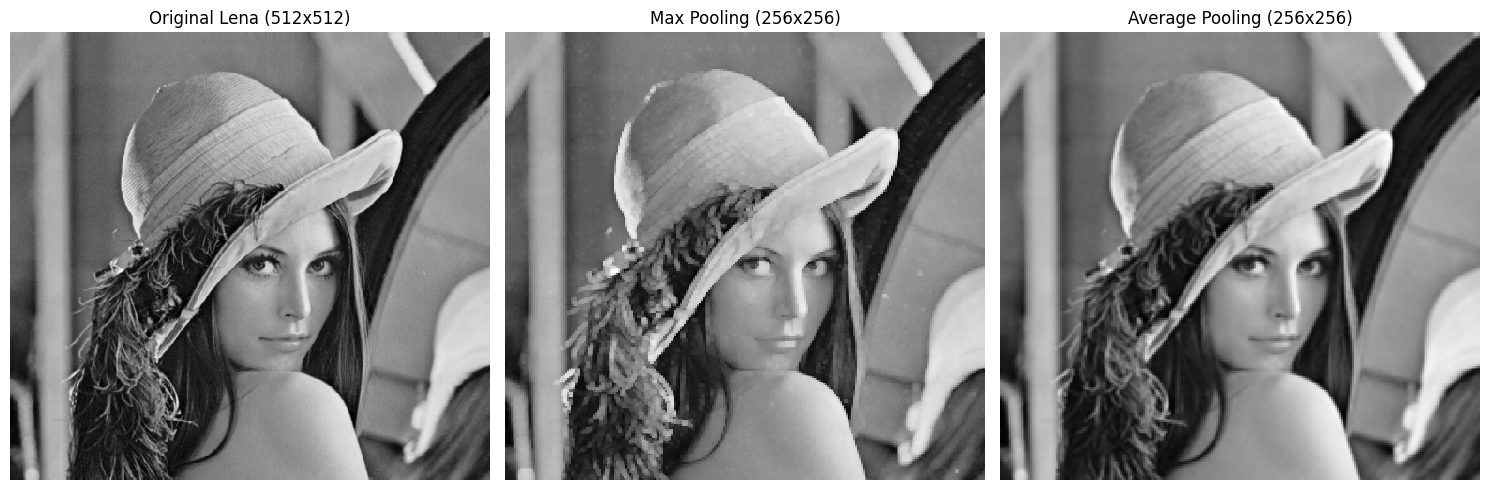

In [21]:
# visulaize original, max pool and Avg pool
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Lena (512x512)")
sns.heatmap(lena, cmap='gray', cbar=False)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Max Pooling (256x256)")
sns.heatmap(max_pool_np, cmap='gray', cbar=False)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Average Pooling (256x256)")
sns.heatmap(avg_pool_np, cmap='gray', cbar=False)
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
print("Original shape:", lena.shape)
print("MaxPooling shape:", max_pool_np.shape)
print("AveragePooling shape:", avg_pool_np.shape)

Original shape: (512, 512)
MaxPooling shape: (256, 256)
AveragePooling shape: (256, 256)





```
# CNN Backpropgation Working

```



array([[102, 102, 103, ...,  38,   0,   0],
       [102, 103, 102, ...,  38,   0,   0],
       [102, 101, 101, ...,  38,   0,   0],
       ...,
       [ 59,  59,  59, ...,  38,   0,   0],
       [ 59,  61,  61, ...,  38,   0,   0],
       [ 59,  61,  61, ...,  38,   0,   0]], dtype=uint8)
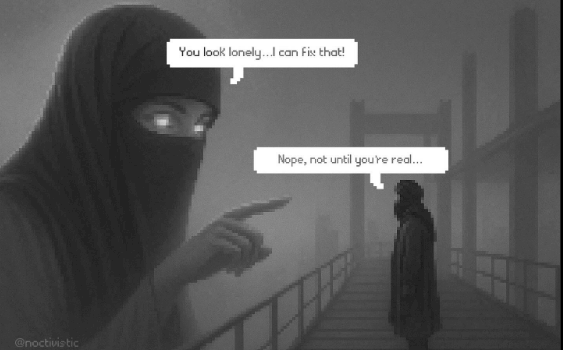

In [44]:
img = cv2.imread("/content/Screenshot 2025-05-18 152827.png", cv2.IMREAD_GRAYSCALE)

img

In [45]:
img = img / 255.0
img_tensor = img[np.newaxis, ..., np.newaxis]

In [46]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=4, padding='same', use_bias=False) # conv layer

In [47]:
target = tf.zeros_like(conv_layer(img_tensor)) # o/p layer

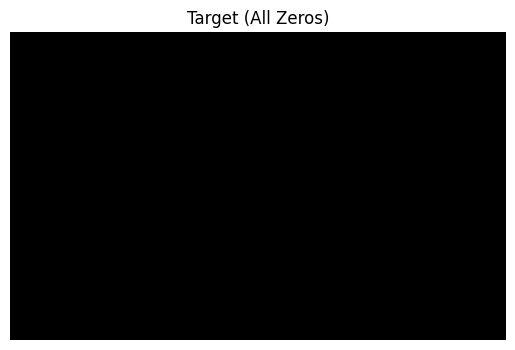

In [48]:
target_np = target[0, :, :, 0].numpy()
plt.imshow(target_np, cmap='gray')
plt.title("Target (All Zeros)")
plt.axis('off')
plt.show()


In [49]:
epochs = 20
losses = []

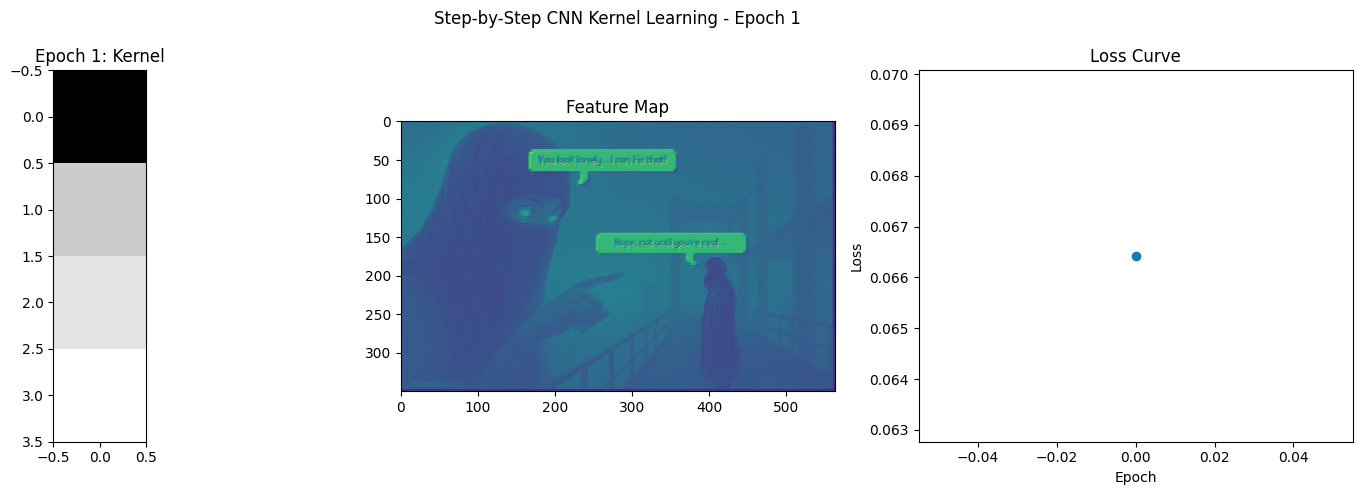

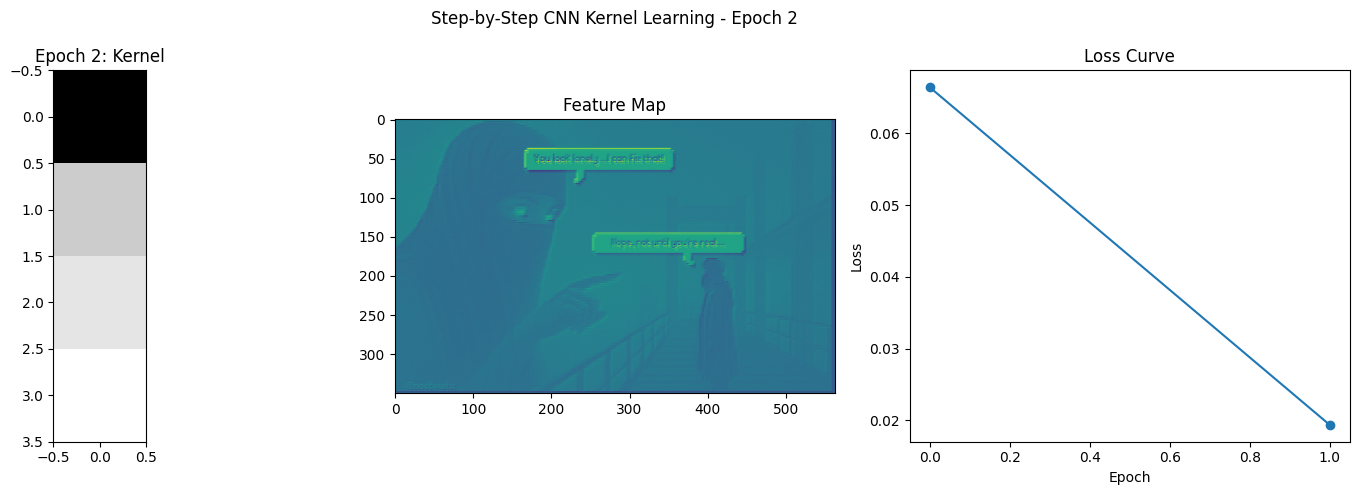

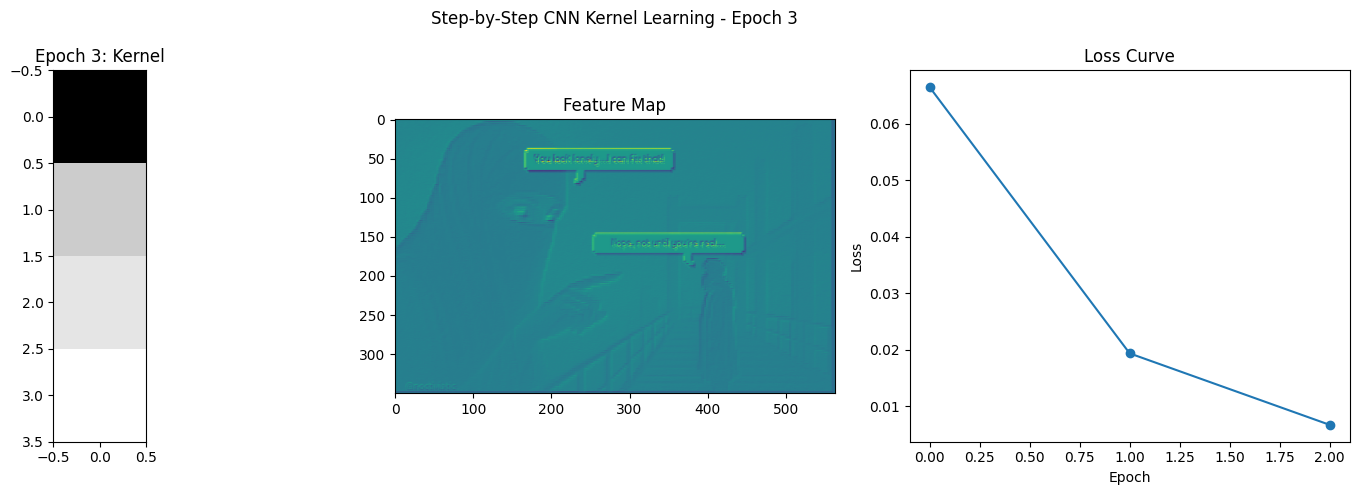

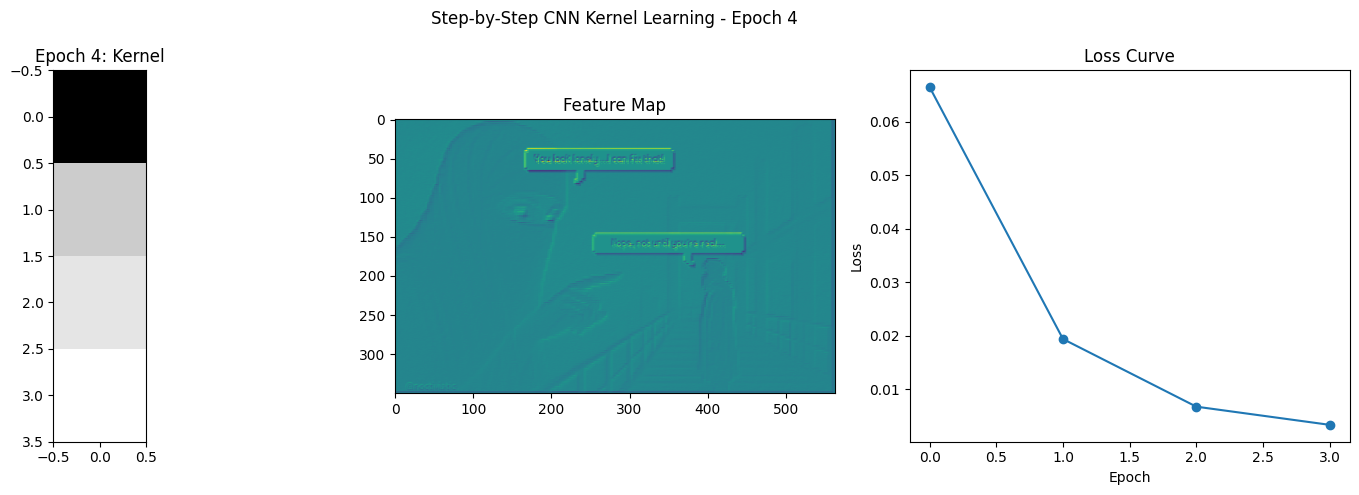

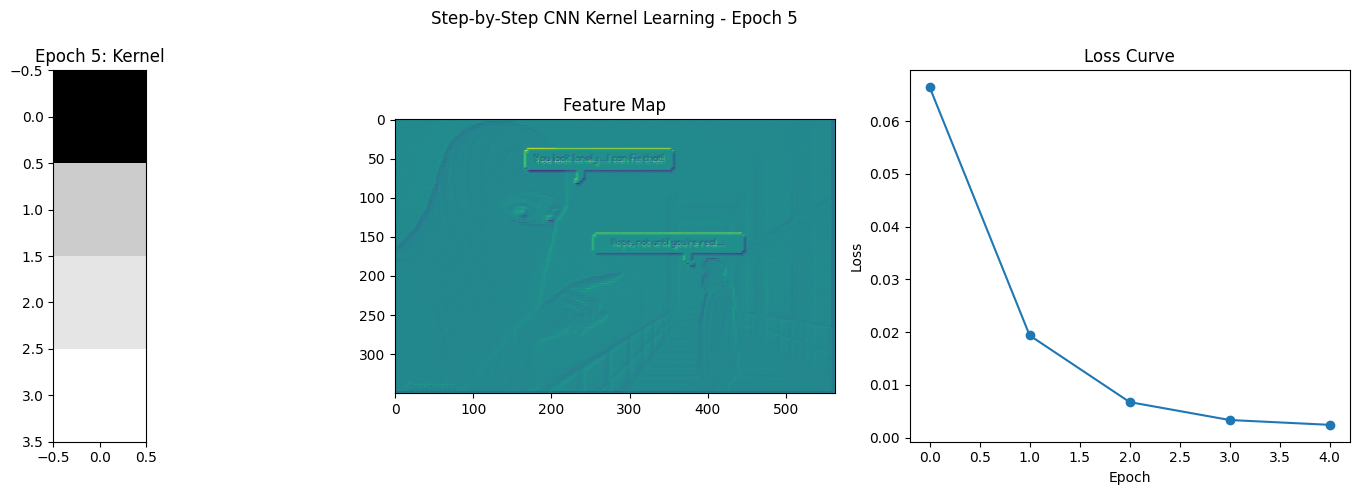

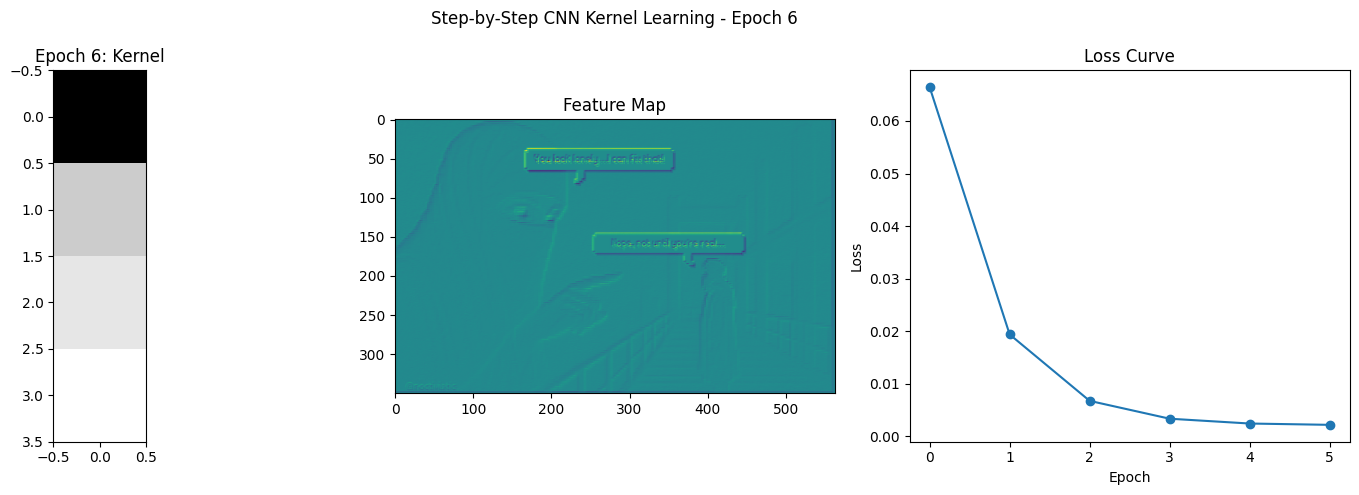

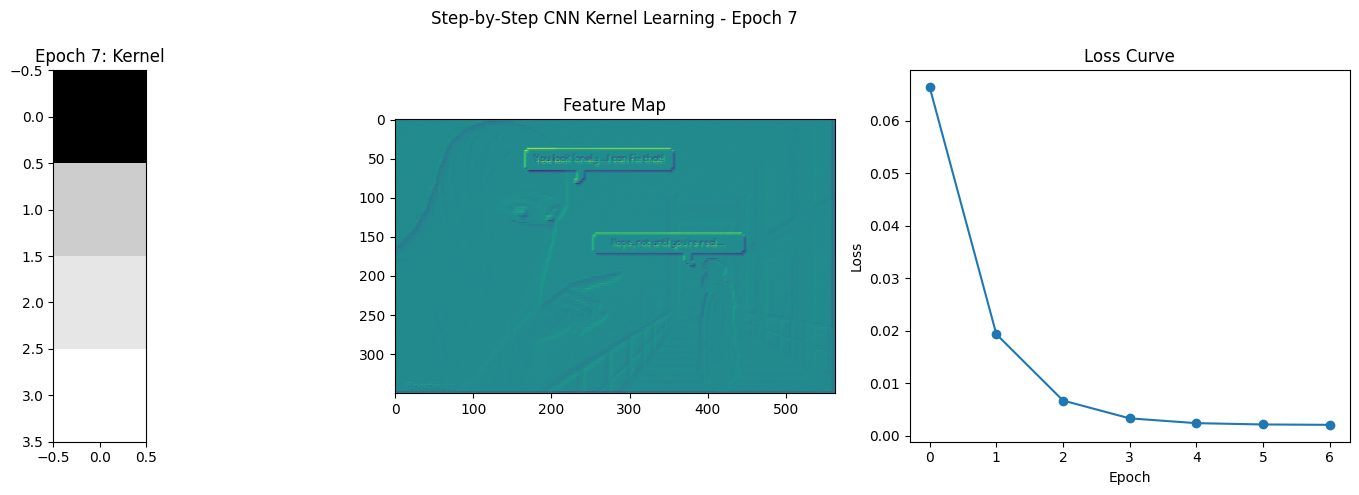

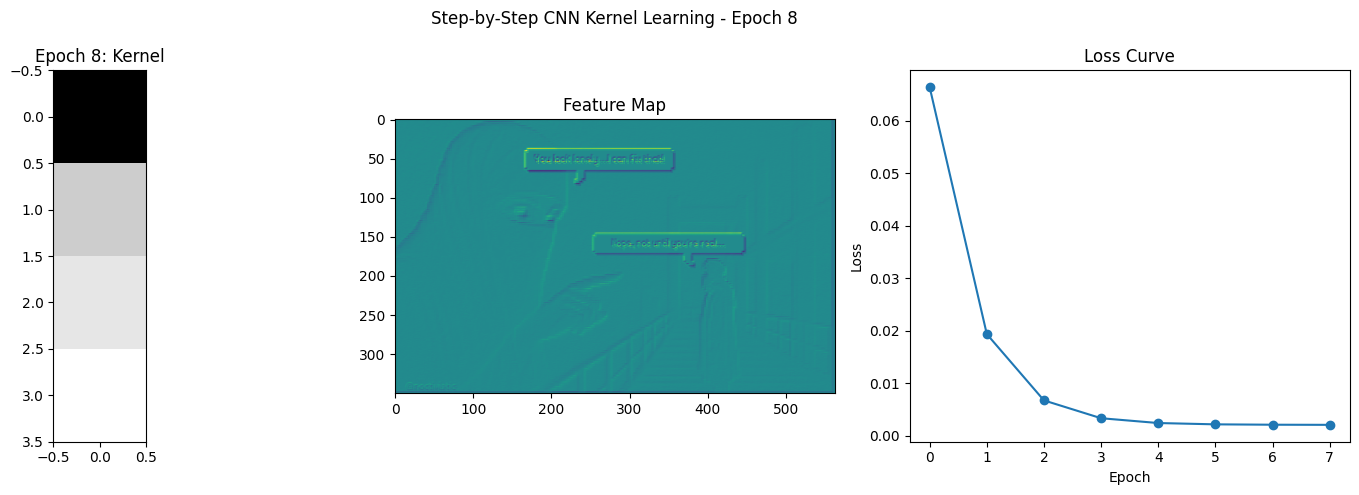

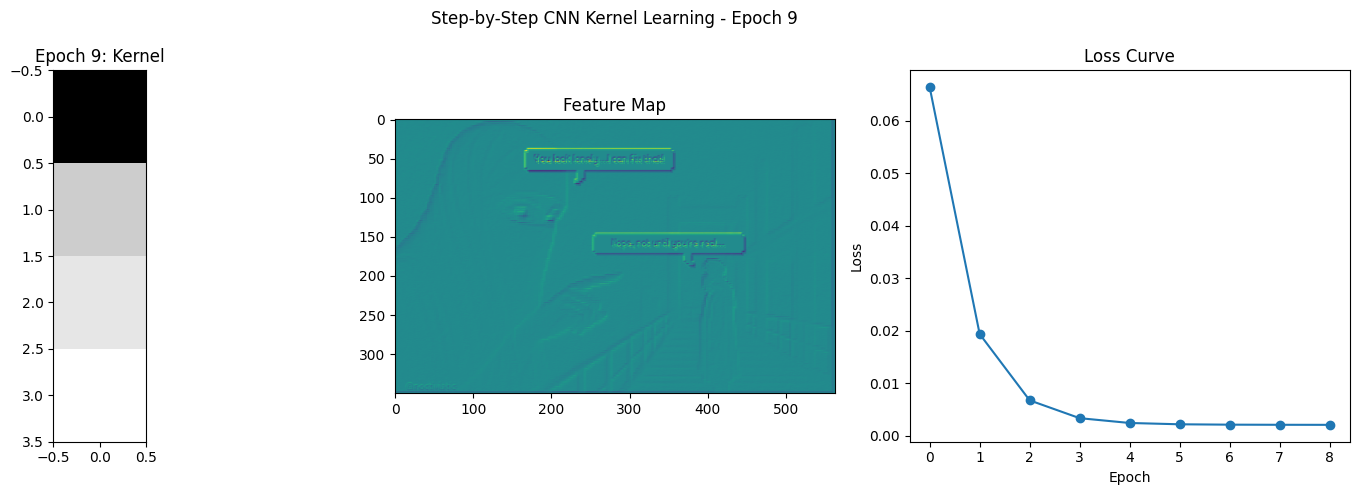

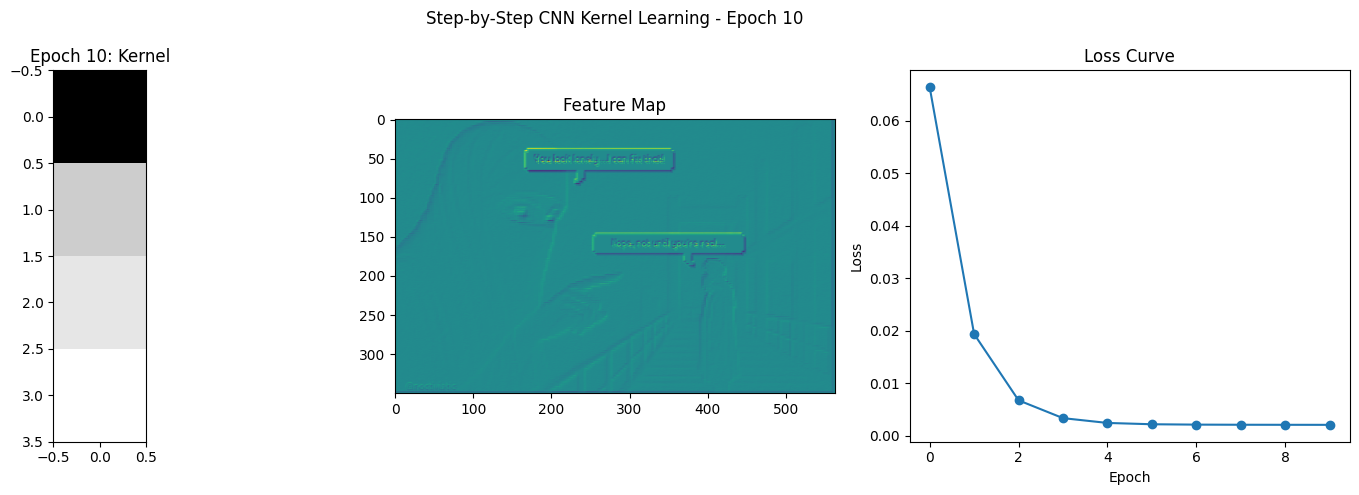

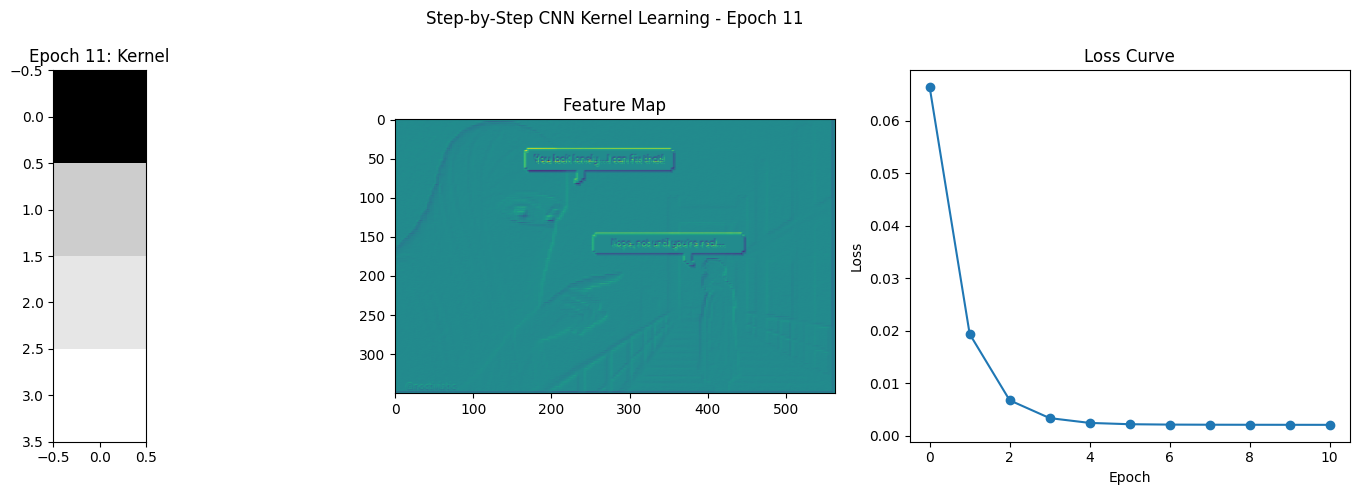

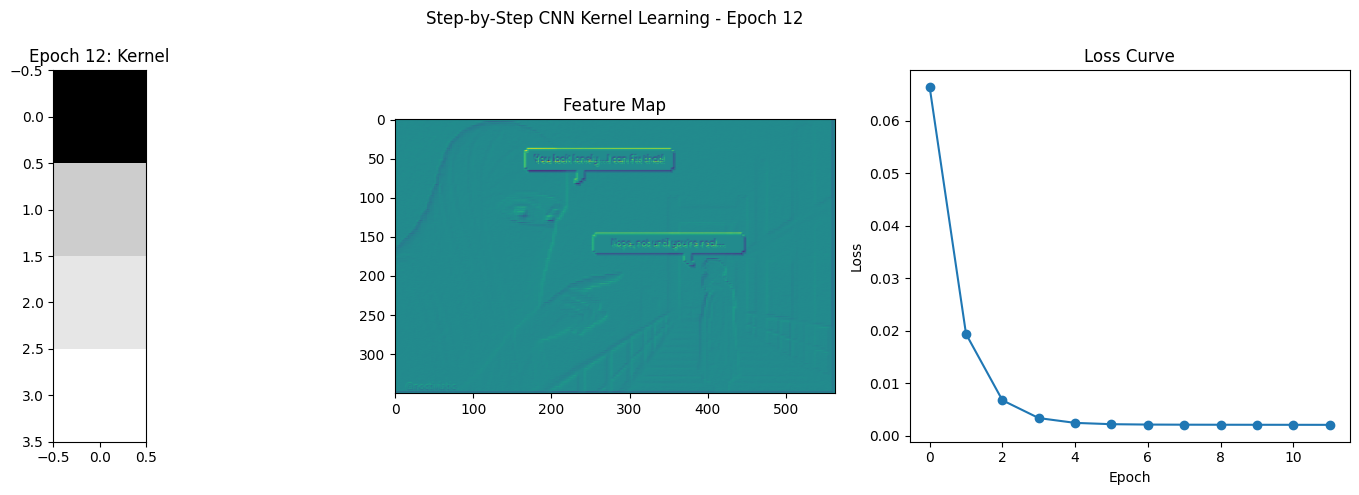

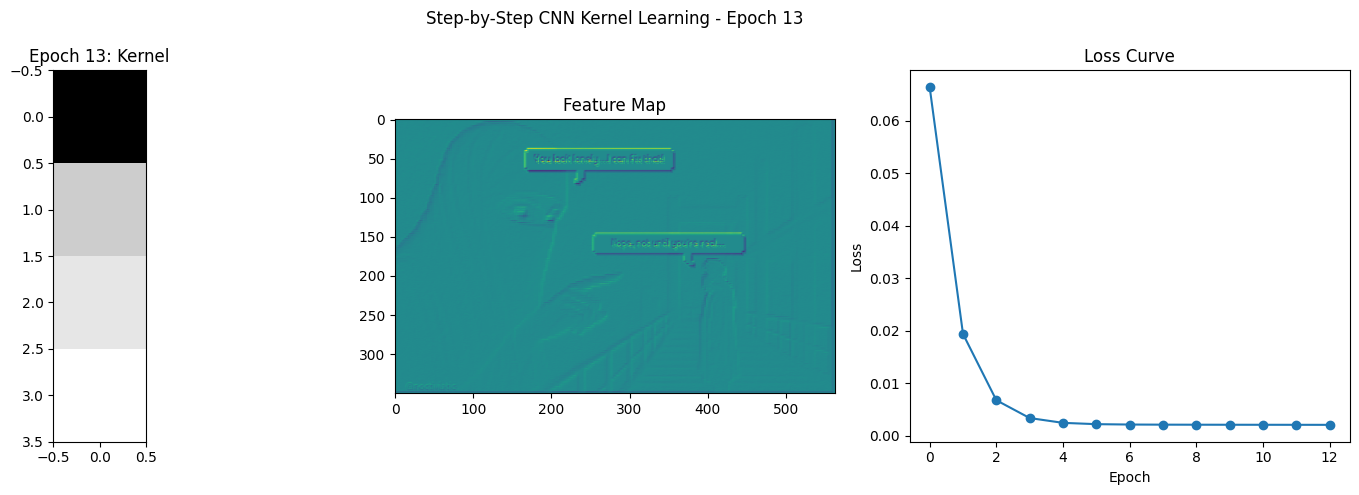

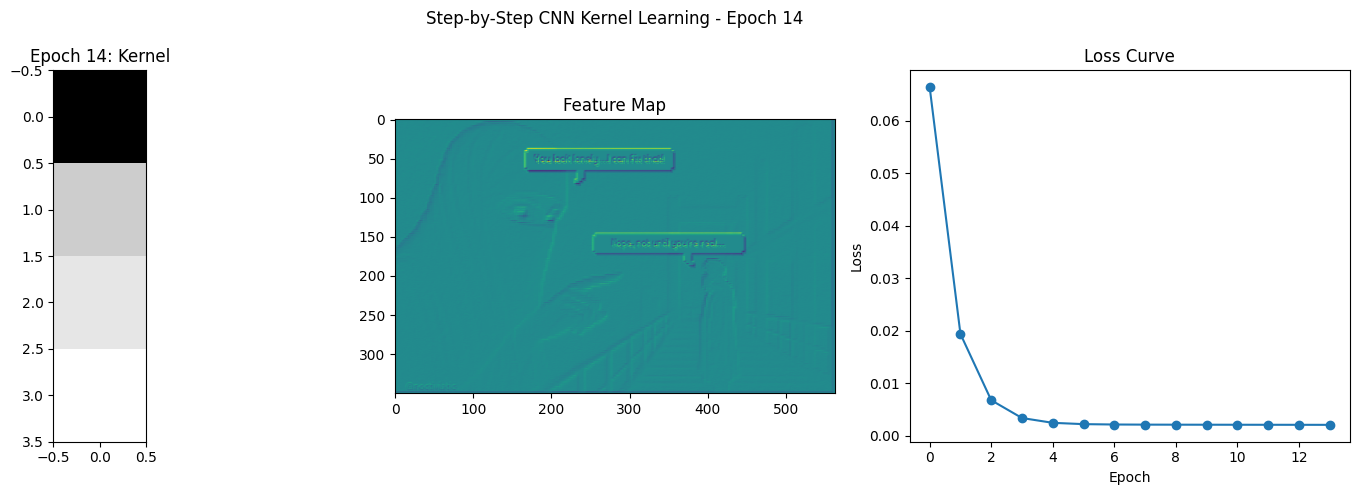

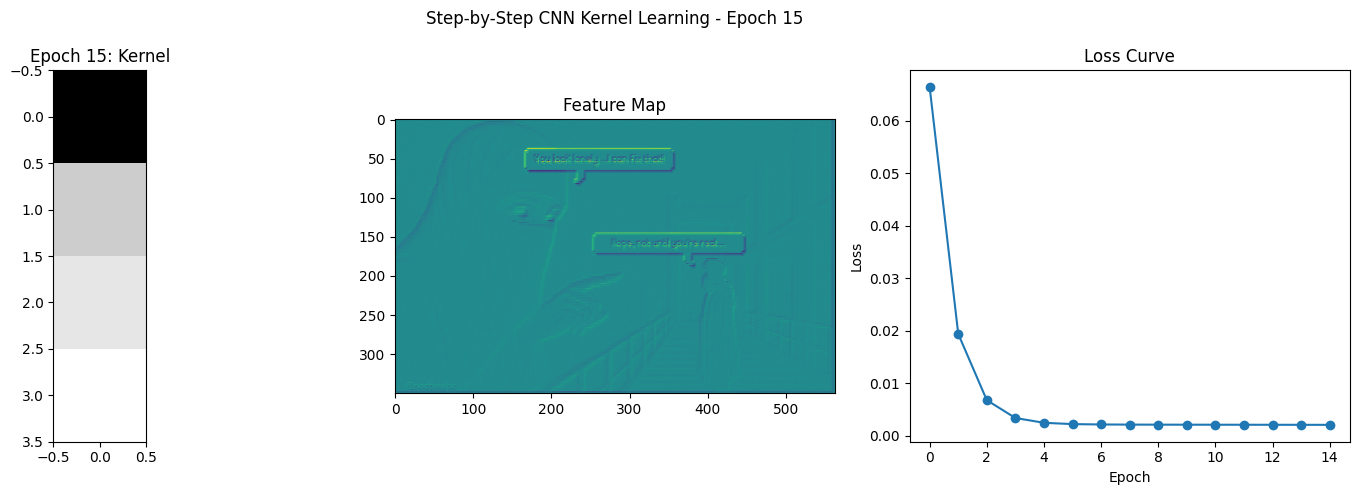

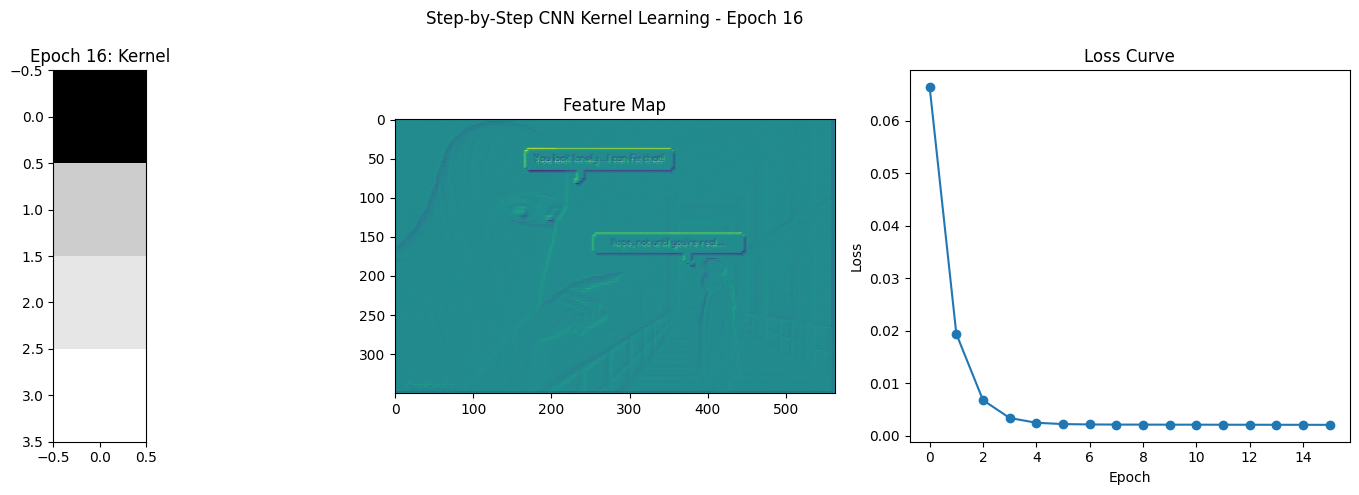

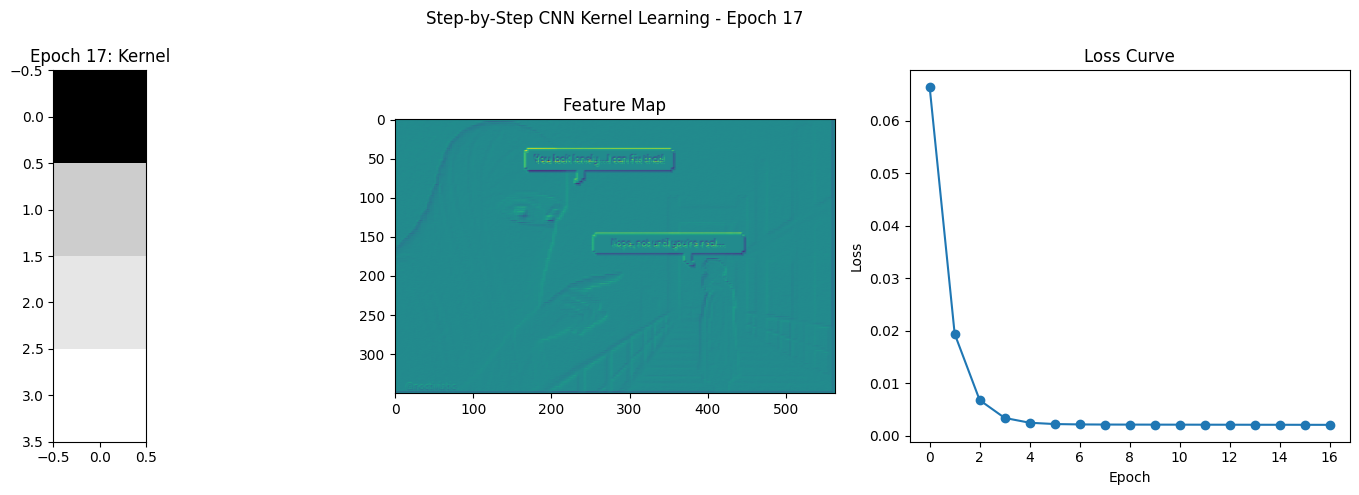

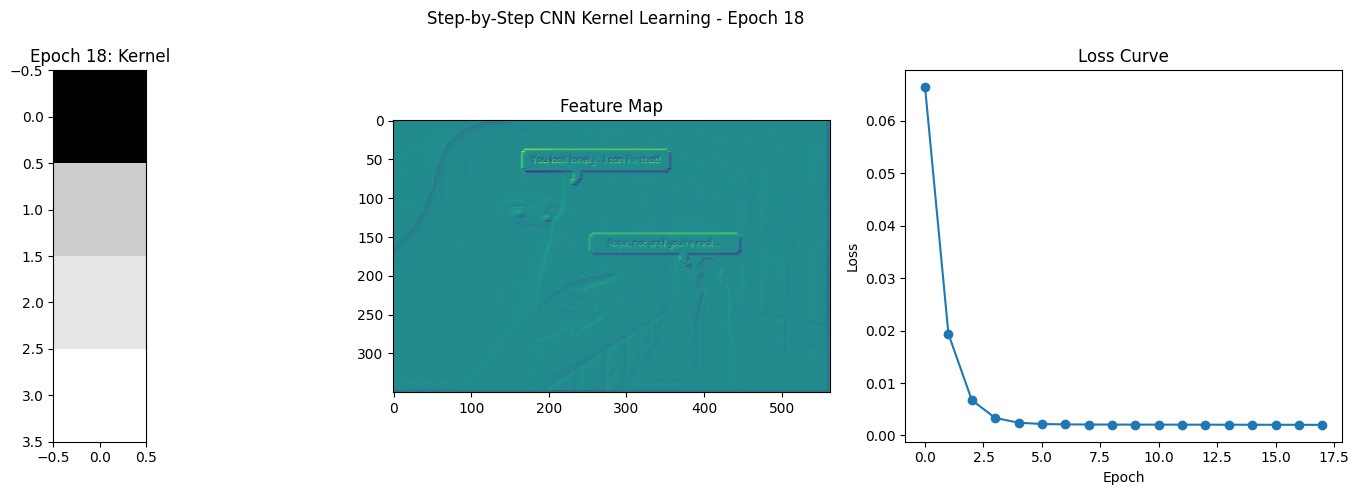

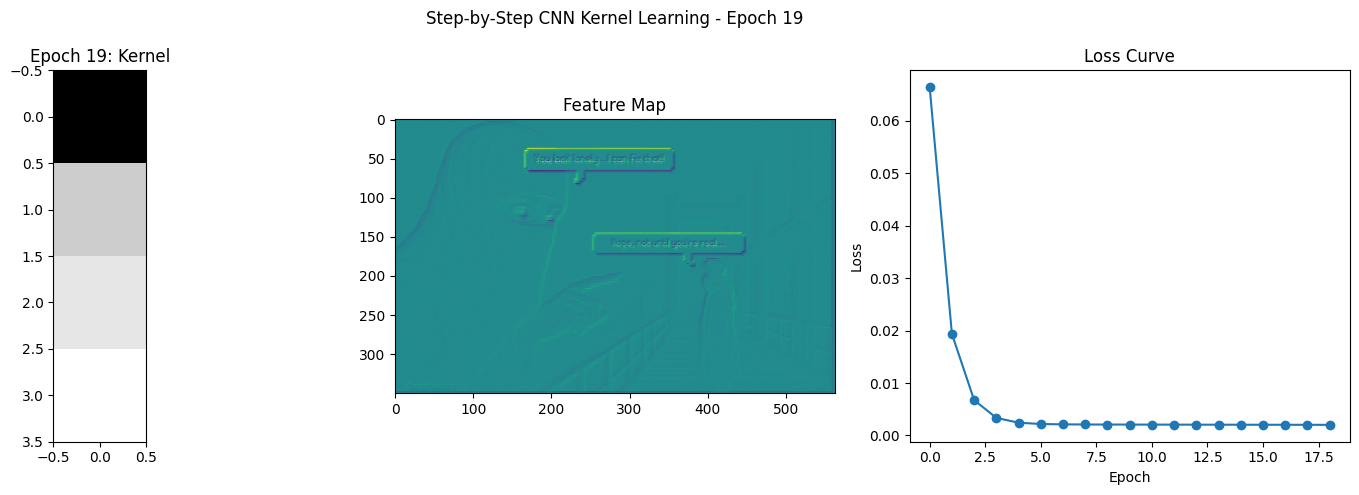

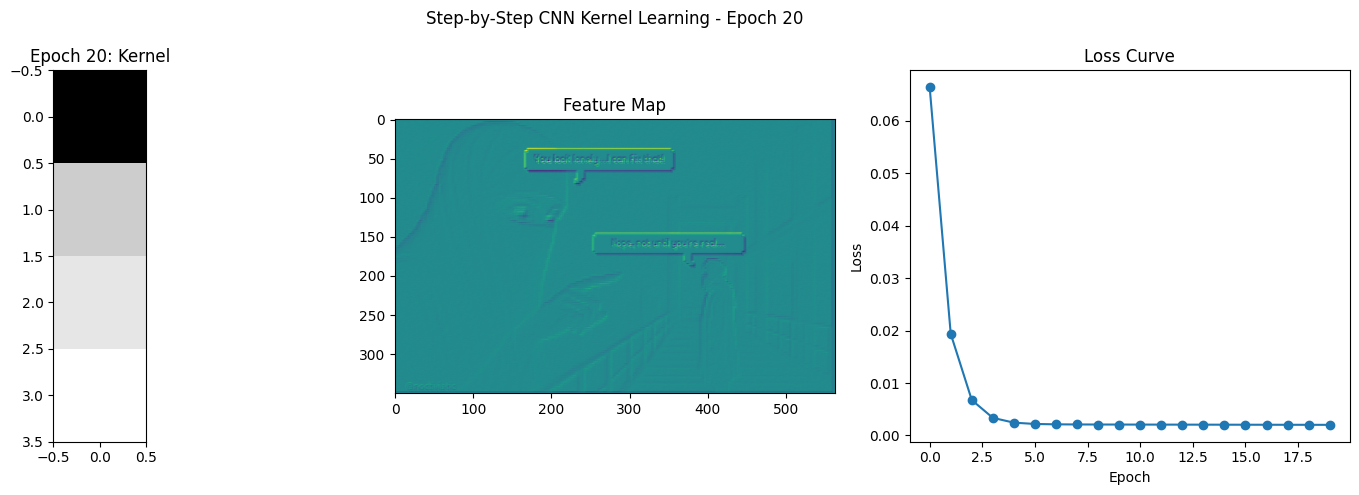

In [50]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        output = conv_layer(img_tensor)
        loss = tf.reduce_mean(tf.square(output - target))
    grads = tape.gradient(loss, conv_layer.trainable_variables)
    conv_layer.kernel.assign(conv_layer.kernel - 0.1 * grads[0])

    # Save loss
    losses.append(loss.numpy())

    # Plot step-by-step
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(conv_layer.kernel.numpy()[0, :, :, 0], cmap='gray')
    axs[0].set_title(f"Epoch {epoch+1}: Kernel")

    axs[1].imshow(output[0, ..., 0], cmap='viridis')
    axs[1].set_title("Feature Map")

    axs[2].plot(losses, marker='o')
    axs[2].set_title("Loss Curve")
    axs[2].set_xlabel("Epoch")
    axs[2].set_ylabel("Loss")

    plt.suptitle(f"Step-by-Step CNN Kernel Learning - Epoch {epoch+1}")
    plt.tight_layout()
    plt.show()